In [1]:
% pylab inline
import os
import random

import pandas as pd
from scipy.misc import imread
from sklearn.metrics import accuracy_score

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Convolution2D, Flatten, MaxPooling2D, Reshape, InputLayer

Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


In [2]:
root_dir = os.path.abspath('C:/Users/user/Downloads/age')
data_dir = 'C:/Users/user/Downloads/age/data'

train = pd.read_csv(os.path.join(data_dir, 'train.csv'))
test = pd.read_csv(os.path.join(data_dir, 'test.csv'))

Age:  YOUNG


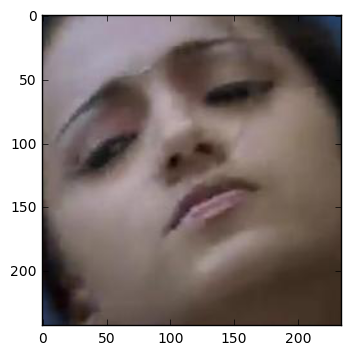

In [18]:
i = random.choice(train.index)

img_name = train.ID[i]
img = imread(os.path.join(data_dir, 'Train', img_name))


imshow(img)
print('Age: ', train.Class[i])

In [9]:
from scipy.misc import imresize

temp = []
for img_name in train.ID:
    img_path = os.path.join(data_dir, 'Train', img_name)
    img = imread(img_path)
    img = imresize(img, (32, 32))
    img = img.astype('float32') 
    temp.append(img)
    #print(1)

train_x = np.stack(temp)

In [10]:
temp = []
for img_name in test.ID:
    img_path = os.path.join(data_dir, 'Test', img_name)
    img = imread(img_path)
    img = imresize(img, (32, 32))
    temp.append(img.astype('float32'))

test_x = np.stack(temp)

In [11]:
train_x = train_x / 255.
test_x = test_x / 255.

In [12]:
train.Class.value_counts(normalize=True)


MIDDLE    0.542751
YOUNG     0.336883
OLD       0.120366
Name: Class, dtype: float64

In [13]:
import keras
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
train_y = lb.fit_transform(train.Class)
train_y = keras.utils.np_utils.to_categorical(train_y)

In [29]:

train_x_temp = train_x.reshape(-3, 32, 32, 3)

input_shape = (1024,)
input_reshape = (32, 32, 3)

conv_num_filters = 5
conv_filter_size = 5

pool_size = (2, 2)

hidden_num_units = 1536
output_num_units = 3

epochs = 50
batch_size = 250

model = Sequential([
 InputLayer(input_shape=input_reshape),

 Convolution2D(96, (3, 3), activation='relu'),
 MaxPooling2D(pool_size=pool_size),

 Convolution2D(256, (2, 2), activation='relu'),
 MaxPooling2D(pool_size=pool_size),

 Convolution2D(256, (2, 2), activation='relu'),
 MaxPooling2D(pool_size=pool_size),
        
 Convolution2D(384, (2, 2), activation='relu'),

 Flatten(),
 Dense(units=1536, activation='relu'),
 Dense(units=output_num_units, activation='softmax'),
])

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 30, 30, 96)        2688      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 15, 15, 96)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 14, 14, 256)       98560     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 7, 7, 256)         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 6, 6, 256)         262400    
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 3, 3, 256)         0         
__________

In [30]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(train_x, train_y, batch_size=batch_size,epochs=epochs,verbose=1, validation_split=0.3)

Train on 13934 samples, validate on 5972 samples
Epoch 1/50
13934/13934 [==============================] - 18s - loss: 0.9542 - acc: 0.5360 - val_loss: 0.9072 - val_acc: 0.5447
Epoch 2/50
13934/13934 [==============================] - 15s - loss: 0.8210 - acc: 0.6358 - val_loss: 0.7646 - val_acc: 0.6628
Epoch 3/50
13934/13934 [==============================] - 15s - loss: 0.7444 - acc: 0.6755 - val_loss: 0.7299 - val_acc: 0.6922
Epoch 4/50
13934/13934 [==============================] - 15s - loss: 0.7111 - acc: 0.6892 - val_loss: 0.6940 - val_acc: 0.6937
Epoch 5/50
13934/13934 [==============================] - 15s - loss: 0.6621 - acc: 0.7141 - val_loss: 0.6796 - val_acc: 0.7130
Epoch 6/50
13934/13934 [==============================] - 15s - loss: 0.6236 - acc: 0.7312 - val_loss: 0.6415 - val_acc: 0.7230
Epoch 7/50
13934/13934 [==============================] - 15s - loss: 0.6076 - acc: 0.7396 - val_loss: 0.6330 - val_acc: 0.7314
Epoch 8/50
13934/13934 [==============================]

In [31]:
sample_submission = pd.read_csv(os.path.join(data_dir, 'Sample_Submission.csv'))


In [32]:
test_x_temp = test_x.reshape(-3, 32, 32, 3)
pred = model.predict_classes(test_x_temp)

pred.shape

6592/6636 [============================>.] - ETA: 0s

(6636,)

In [33]:
pred_f = lb.inverse_transform(pred)

In [34]:
sample_submission.ID = test.ID; sample_submission.Class = pred_f
sample_submission.to_csv(os.path.join(data_dir, 'sub.csv'), index=False)

In [35]:
sample_submission.shape

(6636, 2)